# Metadata training

Idea: use MLP on metadata to predict labels.

First, process labels into one-hot encoded vector.

In [17]:
%load_ext autoreload
%autoreload 2
from data_provider import DataProvider
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# Initialize data provider class
dp = DataProvider(clustering_method='kmeans', debug=True)
cluster_config = {
    'n_clusters': 15
}

Reading labels.
Reading metadata.


In [19]:
dp.generate_training_classes(config=cluster_config)
dp.labels_df.head()

Clustering mbtag_embedding.


,mbtag,mbtag_embedding,cluster
7,"[hip hop rnb and dance hall, hip hop]","[0.64347446, -0.048744507, 0.66661394, -0.1854...",12
14,[world],"[0.6685293, -0.4602034, -0.2661725, -0.1019489...",13
16,[folk],"[0.5258156, 0.12767166, 0.44252962, 0.94580036...",0
17,[brutal death metal],"[-0.37924206, 0.58851165, -0.049779158, -0.247...",10
18,[post-hardcore],"[-0.026857091, 0.2893848, -0.08303145, 0.21819...",11


In [20]:
distinct_clusters = dp.labels_df['cluster'].nunique()
print(distinct_clusters)

15


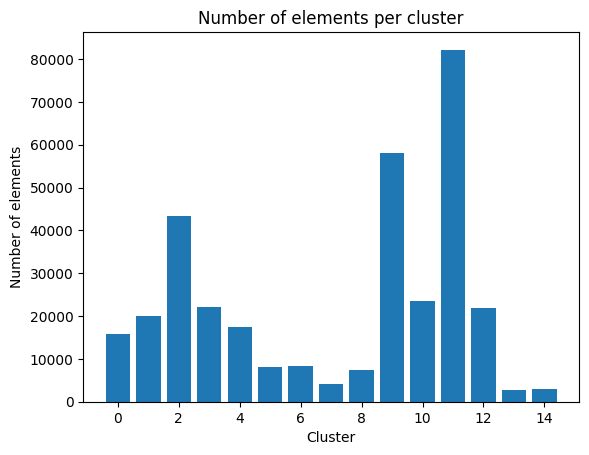

In [21]:
counts = pd.DataFrame(dp.labels_df['cluster']).value_counts()
counts = counts.reset_index()
counts.columns = ['cluster', 'count']
plt.bar(x=counts['cluster'], height=counts['count'])
plt.title('Number of elements per cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of elements')
plt.show()